In [35]:
%run extract_data.py

Your data is ready! Merged table name is zillow_full.


In [38]:
zillow_full

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,0.152349,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,0.110755,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,0.120030,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,0.055509,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373


In [39]:
zillow_full.isnull().sum()

Zipcode                    0
City                       0
State                      0
Metro                      0
County                     0
SizeRank                   0
Date                       0
Rent                       0
Year                       0
State-County               0
AQIMean                  221
PersonalIncome           291
Vol_moderate_income     5238
Vol_low_income          5238
total_pop                  0
households                 0
median_age                 0
median_income              0
income_per_capita          0
gini_index                 0
pct_poverty                0
housing_availability       0
home_density               0
pct_employed               0
pct_jobs_nightlife         0
pct_unemployed             0
move_within_city           0
move_new_city              0
avg_commute_time           0
pct_college                0
dtype: int64

In [4]:
zillow_full = zillow_full.drop(['PersonalIncome', 'AQIMean', 'Vol_moderate_income', 'Vol_low_income'], axis=1)

In [5]:
# SF Metro
counties_sf = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']
# NY Metro:
counties_ny = ['New York County', 'Bronx County', 'Queens County', 'Kings County', 'Richmond County']
# Greater Austin Metro:
counties_au = ['Bastrop County', 'Caldwell County', 'Hays County', 'Travis County', 'Williamson County']
# Miami Metro:
counties_mi = ['Miami-Dade County', 'Broward County', 'Palm Beach County']

In [40]:
zillow_sf = zillow_full[zillow_full['County'].isin(counties_sf)]

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from PlottingFunctions import plot_inertia, plot_silhouette
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt

In [6]:
kmeans = KMeans()

## Cluster across all areas, no rent

In [27]:
zillow_selected = zillow_full[zillow_full['County'].isin(counties_sf+counties_ny+counties_au+counties_mi)].reset_index().drop('index', axis=1)
zillow_selected

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,0.152349,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,0.110755,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,0.120030,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,0.055509,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373


In [28]:
num_cols = zillow_selected.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank', 'Rent'], axis=1)
num_cols.head()

,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,2015,92805.0,41910.0,41.3,85930.0,72802.0,0.5968,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,2015,62435.0,33693.0,43.3,130452.0,119276.0,0.5604,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,2015,74993.0,33540.0,43.6,35859.0,32694.0,0.5838,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,2015,100277.0,36733.0,34.7,52052.0,26057.0,0.4631,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,2015,103732.0,36732.0,33.7,37015.0,19100.0,0.4810,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


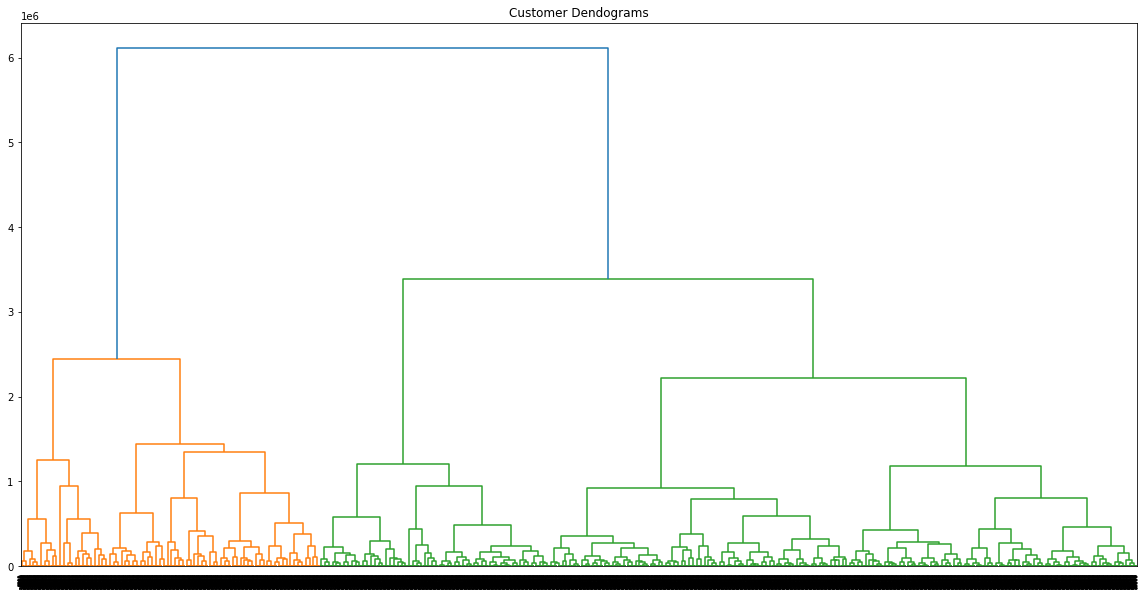

In [15]:
plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

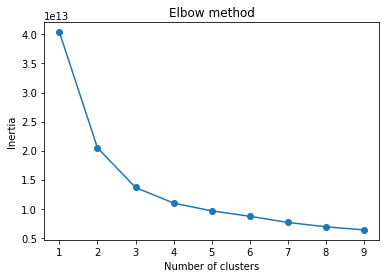

In [29]:
plot_inertia(kmeans, num_cols, range(1, 10))

In [30]:
kmeans.set_params(n_clusters=4, random_state=1)
kmeans.fit(num_cols)

KMeans(n_clusters=4)

In [97]:
kmeans1 = KMeans()
kmeans1.set_params(n_clusters=2)
kmeans1.fit(num_cols)

KMeans(n_clusters=2)

In [99]:
kmeans.cluster_centers_

array([[2.01704918e+03, 3.45192024e+04, 1.35227857e+04, 4.01178571e+01,
        8.42351786e+04, 4.81152619e+04, 4.68163095e-01, 1.03398282e-01,
        1.14358118e+00, 2.58304163e+00, 9.49450567e-01, 9.76802889e-02,
        4.95956353e-02, 6.02228289e-02, 6.12913022e-02, 3.13013901e+01,
        2.12233547e-01],
       [2.01704918e+03, 3.75866279e+04, 1.70472791e+04, 3.78069767e+01,
        1.32098302e+05, 9.30337442e+04, 4.99637209e-01, 7.76700809e-02,
        1.15804608e+00, 2.20788248e+00, 9.62128867e-01, 6.78560147e-02,
        3.71026845e-02, 8.48972665e-02, 8.78399880e-02, 2.55826570e+01,
        2.96398682e-01],
       [2.01704918e+03, 3.60547159e+04, 1.27821250e+04, 3.73840909e+01,
        5.21699545e+04, 2.82210795e+04, 4.76271591e-01, 1.95830698e-01,
        1.15138948e+00, 2.87513790e+00, 9.29321735e-01, 1.30544574e-01,
        7.01172464e-02, 6.71508580e-02, 6.34193097e-02, 3.17846427e+01,
        1.36328093e-01],
       [2.01704918e+03, 7.65284879e+04, 2.66335497e+04, 3.584

In [68]:
var_influence=kmeans.cluster_centers_
var_influence = pd.DataFrame(var_influence, columns = num_cols.columns)
var_influence

,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,2017.04918,36054.715909,12782.125000,37.384091,52169.954545,28221.079545,0.476272,0.195831,1.151389,2.875138,0.929322,0.130545,0.070117,0.067151,0.063419,31.784643,0.136328
1,2017.04918,37586.627907,17047.279070,37.806977,132098.302326,93033.744186,0.499637,0.077670,1.158046,2.207882,0.962129,0.067856,0.037103,0.084897,0.087840,25.582657,0.296399
2,2017.04918,76528.487939,26633.549708,35.844189,52579.672880,27049.854898,0.478554,0.210578,1.084355,2.905521,0.922971,0.114375,0.076447,0.059131,0.030099,37.800464,0.123676
3,2017.04918,34519.202381,13522.785714,40.117857,84235.178571,48115.261905,0.468163,0.103398,1.143581,2.583042,0.949451,0.097680,0.049596,0.060223,0.061291,31.301390,0.212234


In [92]:
var_influence.describe().sort_values(axis=1, by='std', ascending=False)

,median_income,income_per_capita,total_pop,households,avg_commute_time,median_age,home_density,pct_college,pct_poverty,housing_availability,pct_jobs_nightlife,move_new_city,pct_unemployed,pct_employed,gini_index,move_within_city,Year
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
mean,80270.777081,49104.985133,46172.258534,17496.434873,31.617288,37.788278,2.642896,0.192159,0.146869,1.134343,0.102614,0.060663,0.058316,0.940968,0.480657,0.067850,2017.04918
std,37675.201089,30839.810345,20276.193786,6369.280798,4.992536,1.767309,0.324411,0.079741,0.066167,0.033845,0.026776,0.023669,0.018203,0.018067,0.013416,0.011907,0.00000
min,52169.954545,27049.854898,34519.202381,12782.125000,25.582657,35.844189,2.207882,0.123676,0.077670,1.084355,0.067856,0.030099,0.037103,0.922971,0.468163,0.059131,2017.04918
25%,52477.243296,27928.273384,35670.837527,13337.620536,29.871707,36.999115,2.489252,0.133165,0.096966,1.128775,0.090224,0.053493,0.046472,0.927734,0.474244,0.059950,2017.04918
50%,68407.425726,38168.170725,36820.671908,15285.032392,31.543016,37.595534,2.729090,0.174281,0.149614,1.147485,0.106027,0.062355,0.059856,0.939386,0.477413,0.063687,2017.04918
75%,96200.959510,59344.882475,47322.092915,19443.846729,33.288598,38.384697,2.882734,0.233275,0.199517,1.153054,0.118417,0.069524,0.071700,0.952620,0.483825,0.071587,2017.04918
max,132098.302326,93033.744186,76528.487939,26633.549708,37.800464,40.117857,2.905521,0.296399,0.210578,1.158046,0.130545,0.087840,0.076447,0.962129,0.499637,0.084897,2017.04918


<AxesSubplot:>

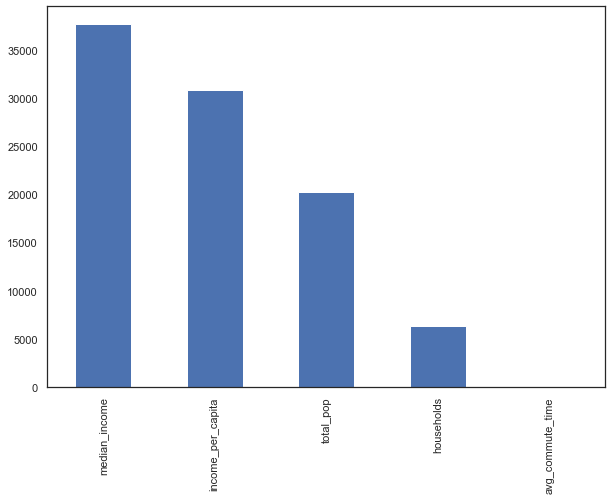

In [89]:
var_influence.describe().sort_values(axis=1, by='std', ascending=False).iloc[2,:5].plot.bar(figsize=(10,7))

In [31]:
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,2
1,1
2,2
3,2
4,2
...,...
17746,0
17747,3
17748,3
17749,1


In [34]:
zillow_selected_clustered = pd.concat([zillow_selected, clusters['Clusters']], axis=1)
zillow_selected_clustered

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,2
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,2
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,2
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364,0
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597,3
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850,3
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373,1


In [33]:
zillow_selected_clustered.to_csv('all_areas_clusters.csv', index=False)

# San Francisco Area Only

In [44]:
num_cols = zillow_sf.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank'], axis=1)
num_cols.head()

,Rent,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
6,3243.0,2015,56677.0,33108.0,36.9,88593.0,80359.0,0.5337,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
15,1543.0,2015,96081.0,27947.0,34.0,67772.0,26187.0,0.4321,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
31,2091.0,2015,63843.0,25347.0,40.5,89769.0,46554.0,0.4417,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
34,3899.0,2015,74161.0,27736.0,37.1,123576.0,65610.0,0.4810,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
57,2447.0,2015,67186.0,22645.0,38.4,112946.0,44898.0,0.3844,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978


In [45]:
zillow_sf.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
6,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
15,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
31,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
34,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
57,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978


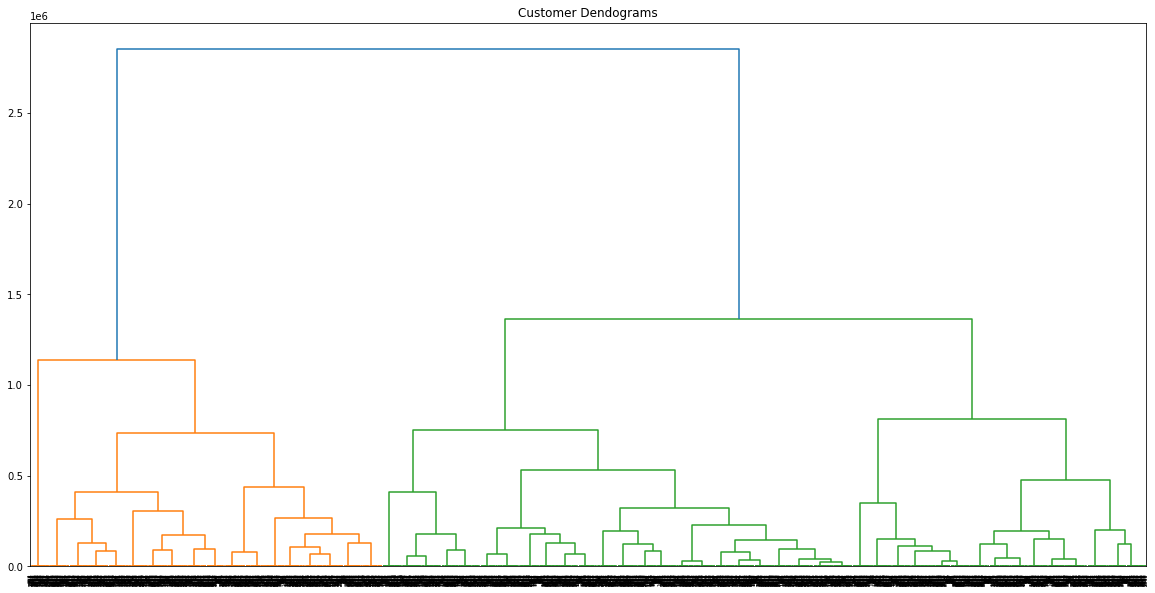

In [47]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

C:\Users\eugen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


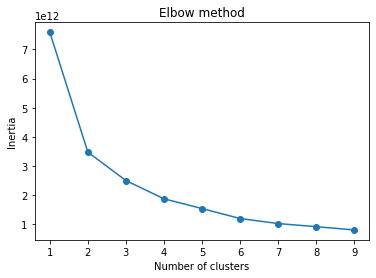

In [48]:
from PlottingFunctions import plot_inertia, plot_silhouette
plot_inertia(kmeans, num_cols, range(1, 10))

In [49]:
kmeans.set_params(n_clusters=2)
kmeans.fit(num_cols)

KMeans(n_clusters=2)

In [52]:
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,1
1,1
2,1
3,0
4,1
...,...
3472,1
3473,0
3474,1
3475,0


In [53]:
zillow_sf_clustered = zillow_sf.reset_index().drop('index', axis=1)
zillow_sf_clustered.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
1,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
2,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
3,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
4,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,0.286818,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456
3473,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,0.078133,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287
3474,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,0.148539,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980
3475,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,0.070235,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271


In [54]:
zillow_sf_clustered = pd.concat([zillow_sf_clustered, clusters['Clusters']], axis=1)
zillow_sf_clustered.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347,1
1,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668,1
2,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555,1
3,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061,0
4,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456,1
3473,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287,0
3474,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980,1
3475,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271,0


In [55]:
zillow_sf_clustered.to_csv('sf_clusters.csv', index=False)

## Clustering with no rent
## San Francisco Bay Area

In [56]:
kmeans = KMeans()
num_cols = zillow_sf.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank', 'Rent'], axis=1)

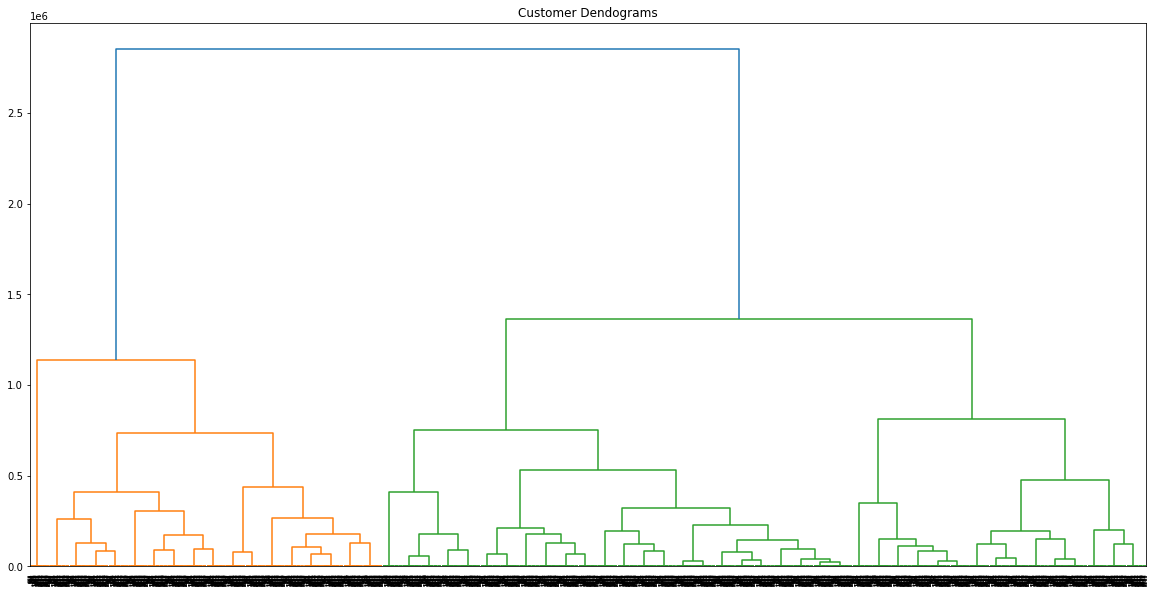

In [57]:
plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

C:\Users\eugen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


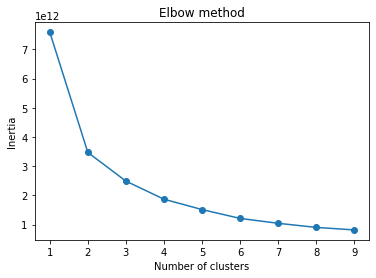

In [58]:
plot_inertia(kmeans, num_cols, range(1, 10))

In [59]:
kmeans.set_params(n_clusters=2)
kmeans.fit(num_cols)
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,1
1,1
2,1
3,0
4,1
...,...
3472,1
3473,0
3474,1
3475,0


In [60]:
zillow_sf_clustered_norent = zillow_sf.reset_index().drop('index', axis=1)
zillow_sf_clustered_norent = pd.concat([zillow_sf_clustered_norent, clusters['Clusters']], axis=1)
zillow_sf_clustered_norent

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347,1
1,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668,1
2,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555,1
3,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061,0
4,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456,1
3473,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287,0
3474,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980,1
3475,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271,0


In [61]:
zillow_sf_clustered_norent.to_csv('sf_clusters_norent.csv', index=False)

## New York

In [62]:
zillow_ny = zillow_full[zillow_full['County'].isin(counties_ny)]
zillow_ny.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


In [67]:
num_cols = zillow_ny.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank', 'Rent'], axis=1)
num_cols.head()

,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,2015,92805.0,41910.0,41.3,85930.0,72802.0,0.5968,0.145510,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281
1,2015,62435.0,33693.0,43.3,130452.0,119276.0,0.5604,0.082199,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305
2,2015,74993.0,33540.0,43.6,35859.0,32694.0,0.5838,0.276575,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389
3,2015,100277.0,36733.0,34.7,52052.0,26057.0,0.4631,0.174138,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736
4,2015,103732.0,36732.0,33.7,37015.0,19100.0,0.4810,0.278866,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000


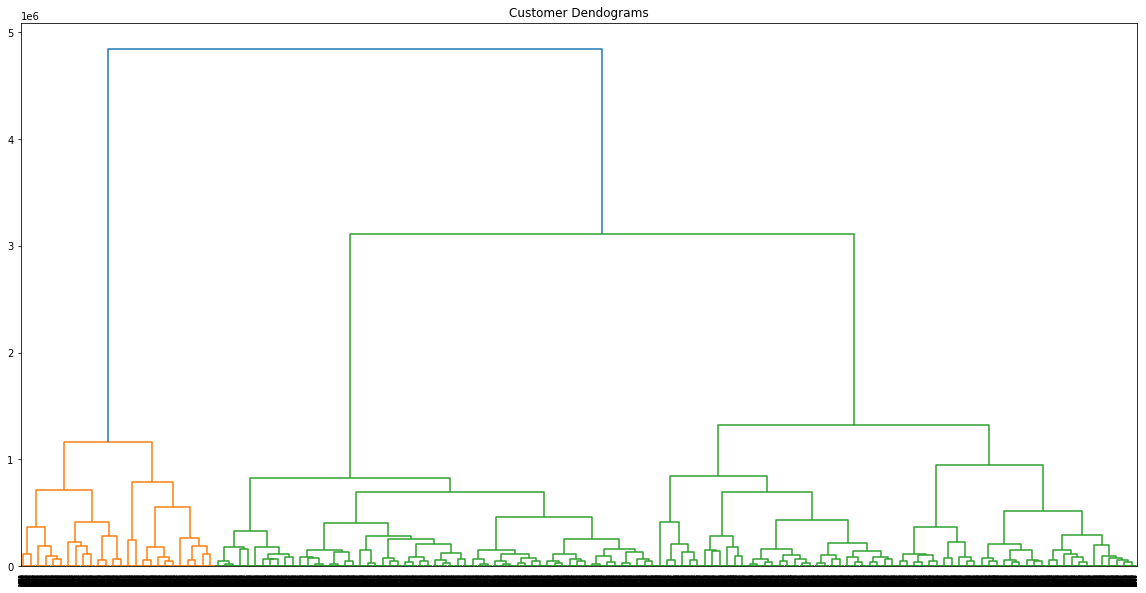

In [68]:
plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

In [69]:
kmeans = KMeans()
kmeans.set_params(n_clusters=3)
kmeans.fit(num_cols)
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
...,...
9084,2
9085,2
9086,2
9087,1


In [70]:
zillow_ny_clustered_norent = zillow_ny.reset_index().drop('index', axis=1)
zillow_ny_clustered_norent = pd.concat([zillow_ny_clustered_norent, clusters['Clusters']], axis=1)
zillow_ny_clustered_norent.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,0
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,0
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,0
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364,2
9085,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597,2
9086,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850,2
9087,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373,1


In [71]:
zillow_ny_clustered_norent.to_csv('ny_clusters_norent.csv', index=False)

## Austin

In [72]:
zillow_au = zillow_full[zillow_full['County'].isin(counties_au)]
zillow_au.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
5,78660,Pflugerville,TX,Austin-Round Rock,Travis County,13,2015-01-01,1133.0,2015,TX-Travis County,...,0.069724,1.035899,2.999833,0.959805,0.080879,0.037766,0.018869,0.126194,26.037470,0.171346
26,78704,Austin,TX,Austin-Round Rock,Travis County,65,2015-01-01,1489.0,2015,TX-Travis County,...,0.133546,1.116898,2.010616,0.965871,0.134366,0.033593,0.130553,0.091367,17.789933,0.333045
33,78745,Austin,TX,Austin-Round Rock,Travis County,83,2015-01-01,1150.0,2015,TX-Travis County,...,0.120052,1.062248,2.384011,0.960628,0.141579,0.039173,0.089755,0.042998,23.739231,0.206879
77,78748,Austin,TX,Austin-Round Rock,Travis County,282,2015-01-01,1224.0,2015,TX-Travis County,...,0.083059,1.044983,2.630745,0.972355,0.097438,0.026229,0.065082,0.047160,27.941186,0.220660
79,78758,Austin,TX,Austin-Round Rock,Travis County,287,2015-01-01,1118.0,2015,TX-Travis County,...,0.183417,1.105226,2.376352,0.960268,0.118816,0.039732,0.123573,0.087929,20.957885,0.180788


In [73]:
num_cols = zillow_au.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank', 'Rent'], axis=1)
num_cols.head()

,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
5,2015,89830.0,29945.0,34.1,83499.0,33870.0,0.3658,0.069724,1.035899,2.999833,0.959805,0.080879,0.037766,0.018869,0.126194,26.037470,0.171346
26,2015,48486.0,24115.0,33.0,70511.0,53557.0,0.4972,0.133546,1.116898,2.010616,0.965871,0.134366,0.033593,0.130553,0.091367,17.789933,0.333045
33,2015,62771.0,26330.0,35.3,62265.0,34654.0,0.4056,0.120052,1.062248,2.384011,0.960628,0.141579,0.039173,0.089755,0.042998,23.739231,0.206879
77,2015,50997.0,19385.0,34.6,77700.0,35891.0,0.3714,0.083059,1.044983,2.630745,0.972355,0.097438,0.026229,0.065082,0.047160,27.941186,0.220660
79,2015,47470.0,19976.0,32.4,53547.0,30082.0,0.4121,0.183417,1.105226,2.376352,0.960268,0.118816,0.039732,0.123573,0.087929,20.957885,0.180788


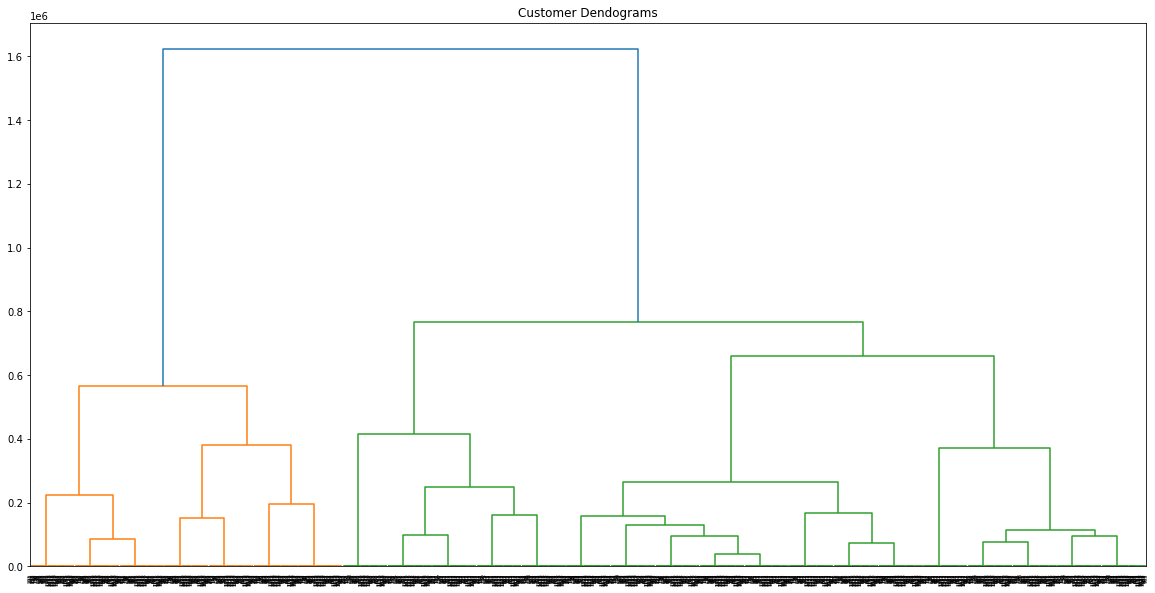

In [74]:
plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

In [75]:
kmeans = KMeans()
kmeans.set_params(n_clusters=2)
kmeans.fit(num_cols)
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
1520,1
1521,0
1522,0
1523,0


In [76]:
zillow_au_clustered_norent = zillow_au.reset_index().drop('index', axis=1)
zillow_au_clustered_norent = pd.concat([zillow_au_clustered_norent, clusters['Clusters']], axis=1)
zillow_au_clustered_norent.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,78660,Pflugerville,TX,Austin-Round Rock,Travis County,13,2015-01-01,1133.0,2015,TX-Travis County,...,1.035899,2.999833,0.959805,0.080879,0.037766,0.018869,0.126194,26.037470,0.171346,0
1,78704,Austin,TX,Austin-Round Rock,Travis County,65,2015-01-01,1489.0,2015,TX-Travis County,...,1.116898,2.010616,0.965871,0.134366,0.033593,0.130553,0.091367,17.789933,0.333045,0
2,78745,Austin,TX,Austin-Round Rock,Travis County,83,2015-01-01,1150.0,2015,TX-Travis County,...,1.062248,2.384011,0.960628,0.141579,0.039173,0.089755,0.042998,23.739231,0.206879,0
3,78748,Austin,TX,Austin-Round Rock,Travis County,282,2015-01-01,1224.0,2015,TX-Travis County,...,1.044983,2.630745,0.972355,0.097438,0.026229,0.065082,0.047160,27.941186,0.220660,0
4,78758,Austin,TX,Austin-Round Rock,Travis County,287,2015-01-01,1118.0,2015,TX-Travis County,...,1.105226,2.376352,0.960268,0.118816,0.039732,0.123573,0.087929,20.957885,0.180788,0


In [77]:
zillow_au_clustered_norent.to_csv('au_clusters_norent.csv', index=False)

## Miami

In [85]:
zillow_mi = zillow_full[zillow_full['County'].isin(counties_mi)]
zillow_mi.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
28,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2015-01-01,1963.0,2015,FL-Miami-Dade County,...,0.124000,1.858643,2.095784,0.955175,0.111366,0.044436,0.034928,0.067789,28.984069,0.203634
35,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2015-01-01,1393.0,2015,FL-Broward County,...,0.119239,1.157823,2.965658,0.953917,0.082686,0.044865,0.023856,0.083511,28.221711,0.110433
37,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2015-01-01,2009.0,2015,FL-Miami-Dade County,...,0.150378,1.580308,1.848769,0.957825,0.253606,0.038903,0.094519,0.115966,21.595318,0.242812
46,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2015-01-01,1295.0,2015,FL-Broward County,...,0.107415,1.110347,3.214633,0.926908,0.109755,0.072419,0.041218,0.066595,28.205537,0.106459
52,33009,Hallandale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,161,2015-01-01,1524.0,2015,FL-Broward County,...,0.195979,1.625156,2.240704,0.931174,0.164485,0.068732,0.056788,0.100979,26.997861,0.135260


In [86]:
num_cols = zillow_mi.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank', 'Rent'], axis=1)
num_cols.head()

,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
28,2015,41113.0,19617.0,49.0,52170.0,48272.0,0.5958,0.124000,1.858643,2.095784,0.955175,0.111366,0.044436,0.034928,0.067789,28.984069,0.203634
35,2015,71763.0,24198.0,35.6,57219.0,25080.0,0.3857,0.119239,1.157823,2.965658,0.953917,0.082686,0.044865,0.023856,0.083511,28.221711,0.110433
37,2015,38606.0,20882.0,41.0,52278.0,61047.0,0.6167,0.150378,1.580308,1.848769,0.957825,0.253606,0.038903,0.094519,0.115966,21.595318,0.242812
46,2015,75306.0,23426.0,36.8,58893.0,26578.0,0.4448,0.107415,1.110347,3.214633,0.926908,0.109755,0.072419,0.041218,0.066595,28.205537,0.106459
52,2015,41276.0,18421.0,45.5,37794.0,26676.0,0.5042,0.195979,1.625156,2.240704,0.931174,0.164485,0.068732,0.056788,0.100979,26.997861,0.135260


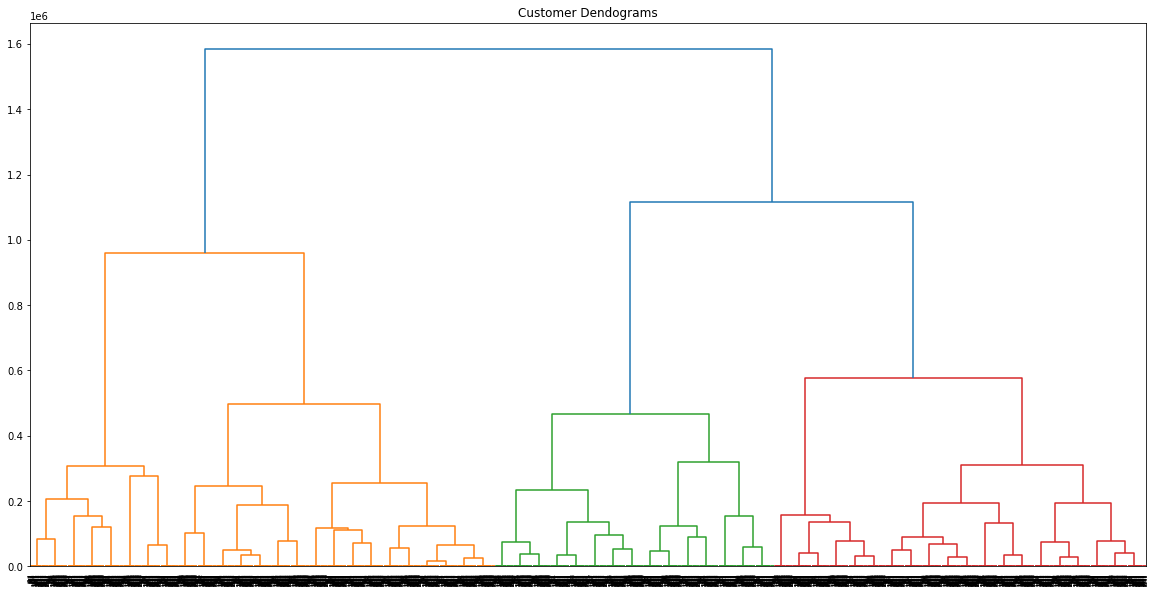

In [87]:
plt.figure(figsize=(20, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(num_cols, method='ward'))

In [88]:
kmeans = KMeans()
kmeans.set_params(n_clusters=4)
kmeans.fit(num_cols)
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,2
1,0
2,3
3,0
4,1
...,...
3655,1
3656,1
3657,3
3658,3


In [89]:
zillow_mi_clustered_norent = zillow_mi.reset_index().drop('index', axis=1)
zillow_mi_clustered_norent = pd.concat([zillow_mi_clustered_norent, clusters['Clusters']], axis=1)
zillow_mi_clustered_norent.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2015-01-01,1963.0,2015,FL-Miami-Dade County,...,1.858643,2.095784,0.955175,0.111366,0.044436,0.034928,0.067789,28.984069,0.203634,2
1,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2015-01-01,1393.0,2015,FL-Broward County,...,1.157823,2.965658,0.953917,0.082686,0.044865,0.023856,0.083511,28.221711,0.110433,0
2,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2015-01-01,2009.0,2015,FL-Miami-Dade County,...,1.580308,1.848769,0.957825,0.253606,0.038903,0.094519,0.115966,21.595318,0.242812,3
3,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2015-01-01,1295.0,2015,FL-Broward County,...,1.110347,3.214633,0.926908,0.109755,0.072419,0.041218,0.066595,28.205537,0.106459,0
4,33009,Hallandale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,161,2015-01-01,1524.0,2015,FL-Broward County,...,1.625156,2.240704,0.931174,0.164485,0.068732,0.056788,0.100979,26.997861,0.135260,1


In [90]:
zillow_mi_clustered_norent.to_csv('mi_clusters_norent.csv', index=False)

In [91]:
num_cols.columns.tolist()

['Year',
 'total_pop',
 'households',
 'median_age',
 'median_income',
 'income_per_capita',
 'gini_index',
 'pct_poverty',
 'housing_availability',
 'home_density',
 'pct_employed',
 'pct_jobs_nightlife',
 'pct_unemployed',
 'move_within_city',
 'move_new_city',
 'avg_commute_time',
 'pct_college']

In [44]:
zillow_selected_clustered

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,2
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,2
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,2
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17746,11416,New York,NY,New York-Newark-Jersey City,Queens County,1818,2020-01-01,2184.0,2020,NY-Queens County,...,1.076348,3.758487,0.926849,0.118820,0.073151,0.064774,0.016516,45.186076,0.105364,0
17747,11436,New York,NY,New York-Newark-Jersey City,Queens County,1820,2020-01-01,2057.0,2020,NY-Queens County,...,1.076510,3.597384,0.908314,0.064390,0.091686,0.053295,0.014245,46.974765,0.091597,3
17748,11366,New York,NY,New York-Newark-Jersey City,Queens County,1826,2020-01-01,2185.0,2020,NY-Queens County,...,1.085258,3.162098,0.915833,0.117797,0.084167,0.056246,0.006280,40.697500,0.187850,3
17749,11109,New York,NY,New York-Newark-Jersey City,New York County,1828,2020-01-01,3325.0,2020,NY-New York County,...,1.376439,2.024712,0.963464,0.034176,0.036536,0.136599,0.120883,28.097646,0.328373,1


In [48]:
zillow_selected_clustered_corr = zillow_selected_clustered.select_dtypes(exclude = ["object"])
zillow_selected_clustered_corr.head()

,SizeRank,Date,Rent,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,1,2015-01-01,3566.0,2015,92805.0,41910.0,41.3,85930.0,72802.0,0.5968,...,1.153877,2.214388,0.932888,0.088021,0.066820,0.084888,0.051420,30.096886,0.216281,2
1,3,2015-01-01,3413.0,2015,62435.0,33693.0,43.3,130452.0,119276.0,0.5604,...,1.231472,1.853056,0.955315,0.082397,0.044685,0.073276,0.039193,27.057535,0.262305,1
2,7,2015-01-01,3508.0,2015,74993.0,33540.0,43.6,35859.0,32694.0,0.5838,...,1.065116,2.235927,0.929920,0.168466,0.070080,0.051605,0.018042,30.594358,0.172389,2
3,11,2015-01-01,1876.0,2015,100277.0,36733.0,34.7,52052.0,26057.0,0.4631,...,1.097732,2.729889,0.928099,0.103083,0.071901,0.045075,0.010311,42.388151,0.127736,2
4,12,2015-01-01,1442.0,2015,103732.0,36732.0,33.7,37015.0,19100.0,0.4810,...,1.048949,2.824023,0.874915,0.129880,0.125085,0.093202,0.008001,43.596975,0.086000,2


<AxesSubplot:>

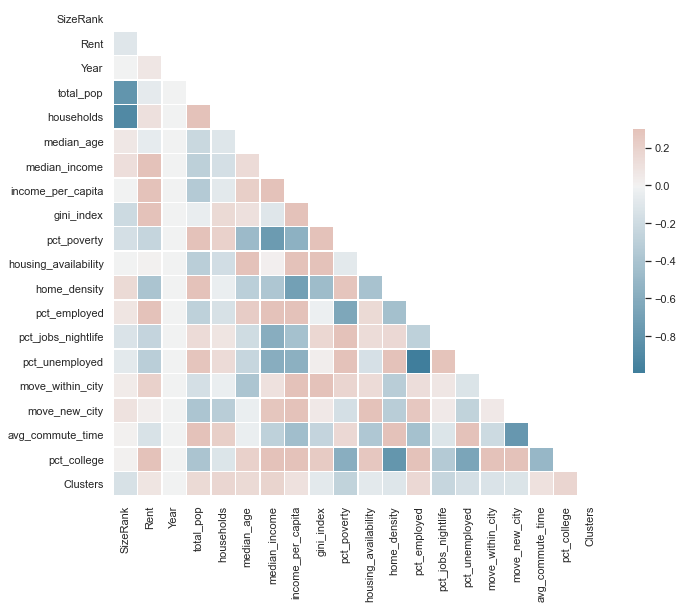

In [50]:
from string import ascii_letters
import seaborn as sns

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = zillow_selected_clustered_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})